In [1]:
#importamos las librerias necesarias para trabajar:
import pandas as pd
from bs4 import BeautifulSoup as bs
import numpy as np
from utils.peticiones import obtenerPrecioM2PorDistritoMadrid, getHttp, obtenerInfoPrecioSueloPorDistritoMadrid

todas_zonas_madrid= obtenerPrecioM2PorDistritoMadrid('todas-las-zonas')
soup_html_madrid_todas=bs(todas_zonas_madrid.text, 'lxml')
tabla_distritos = soup_html_madrid_todas.find('table', {'class': 'table-price'})
lista_de_distritos=[]

#Itero sobre todas las etiquetas tr dentro de la tabla y extraemos nombre y enlace a info de distrito"""
for tr in tabla_distritos.find_all('tr'):
    td = tr.find('td')
    if td is not None:
        a = td.find('a')
        if a is not None:
            href = a['href'].replace("/indice-precio-vivienda/madrid-capital/","")
            nombre_distrito = a.text
            lista_de_distritos.append({ "distrito": nombre_distrito, "url":href})
            
print(lista_de_distritos)

[{'distrito': 'Centro', 'url': 'centro'}, {'distrito': 'Tetuán', 'url': 'tetuan'}, {'distrito': 'Barrio de Salamanca', 'url': 'barrio-de-salamanca'}, {'distrito': 'Carabanchel', 'url': 'carabanchel'}, {'distrito': 'Chamberí', 'url': 'chamberi'}, {'distrito': 'Chamartín', 'url': 'chamartin'}, {'distrito': 'Hortaleza', 'url': 'hortaleza'}, {'distrito': 'Latina', 'url': 'latina'}, {'distrito': 'Ciudad Lineal', 'url': 'ciudad-lineal'}, {'distrito': 'Arganzuela', 'url': 'arganzuela'}, {'distrito': 'Puente de Vallecas', 'url': 'puente-de-vallecas'}, {'distrito': 'Moncloa - Aravaca', 'url': 'moncloa-aravaca'}, {'distrito': 'Retiro', 'url': 'retiro'}, {'distrito': 'San Blas', 'url': 'san-blas'}, {'distrito': 'Villaverde', 'url': 'villaverde'}, {'distrito': 'Fuencarral - El Pardo', 'url': 'fuencarral-el-pardo'}, {'distrito': 'Usera', 'url': 'usera'}, {'distrito': 'Villa de Vallecas', 'url': 'villa-de-vallecas'}, {'distrito': 'Vicálvaro', 'url': 'vicalvaro'}, {'distrito': 'Barajas', 'url': 'bara

In [2]:
#Una vez extraidas todos los distritos y sus urls, vamos a extraer el precio medio del m2 y el el precio medio por m2 de viviendas de una sola habitacion o estudios 

for distrito in lista_de_distritos:
    html_fotocasa_distrito= obtenerPrecioM2PorDistritoMadrid( distrito['url'])
    soup_fotocasa_distrito=bs(html_fotocasa_distrito.text, 'lxml')

    # Obtengo precio medio m2 por distrito
    html_m2 = soup_fotocasa_distrito.find('div', {'class': 'b-detail_title'})
   
    if html_m2 == None:
        html_m2 = soup_fotocasa_distrito.find('div', {'class': 'text-big'})
        precio_m2 = int(html_m2.text.strip().replace("€", "").replace(".", ""))
        distrito['m2_medio']=precio_m2

    else:
        precio_medio_m2 = int(html_m2.text.strip().replace("€/m²", "").replace(".", ""))
        distrito['m2_medio'] = precio_medio_m2

    # Obtengo precio medio m2 por distrito de pisos de una habitación o estudios
    html_m2_por_1hab= soup_fotocasa_distrito.find("div", class_="description-item_semibold")

    if html_m2_por_1hab == None:
         distrito['m2_estudio_q1hab']= 0
    else:
         valor_m2_por_1hab_estudio= int(html_m2_por_1hab.text.strip().replace("€/m²", "").replace(".", ""))
         distrito['m2_estudio_q1hab']=valor_m2_por_1hab_estudio
         
print(lista_de_distritos)

[{'distrito': 'Centro', 'url': 'centro', 'm2_medio': 5941, 'm2_estudio_q1hab': 5802}, {'distrito': 'Tetuán', 'url': 'tetuan', 'm2_medio': 4443, 'm2_estudio_q1hab': 4675}, {'distrito': 'Barrio de Salamanca', 'url': 'barrio-de-salamanca', 'm2_medio': 7157, 'm2_estudio_q1hab': 7504}, {'distrito': 'Carabanchel', 'url': 'carabanchel', 'm2_medio': 2501, 'm2_estudio_q1hab': 3100}, {'distrito': 'Chamberí', 'url': 'chamberi', 'm2_medio': 6228, 'm2_estudio_q1hab': 6471}, {'distrito': 'Chamartín', 'url': 'chamartin', 'm2_medio': 5590, 'm2_estudio_q1hab': 5671}, {'distrito': 'Hortaleza', 'url': 'hortaleza', 'm2_medio': 4233, 'm2_estudio_q1hab': 4592}, {'distrito': 'Latina', 'url': 'latina', 'm2_medio': 2654, 'm2_estudio_q1hab': 2927}, {'distrito': 'Ciudad Lineal', 'url': 'ciudad-lineal', 'm2_medio': 3456, 'm2_estudio_q1hab': 4024}, {'distrito': 'Arganzuela', 'url': 'arganzuela', 'm2_medio': 4362, 'm2_estudio_q1hab': 4601}, {'distrito': 'Puente de Vallecas', 'url': 'puente-de-vallecas', 'm2_medio':

In [3]:
#vamos a transformar en data frame el diccionario obtenido mas arriba:
df_precio_m2_por_distrito = pd.DataFrame(lista_de_distritos, columns=["distrito", "url", "m2_medio", "m2_estudio_q1hab"])
df_precio_m2_por_distrito

,distrito,url,m2_medio,m2_estudio_q1hab
0,Centro,centro,5941,5802
1,Tetuán,tetuan,4443,4675
2,Barrio de Salamanca,barrio-de-salamanca,7157,7504
3,Carabanchel,carabanchel,2501,3100
4,Chamberí,chamberi,6228,6471
5,Chamartín,chamartin,5590,5671
6,Hortaleza,hortaleza,4233,4592
7,Latina,latina,2654,2927
8,Ciudad Lineal,ciudad-lineal,3456,4024
9,Arganzuela,arganzuela,4362,4601


In [4]:
df_precio_m2_por_distrito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   distrito          20 non-null     object
 1   url               20 non-null     object
 2   m2_medio          20 non-null     int64 
 3   m2_estudio_q1hab  20 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 768.0+ bytes


In [5]:
# Una vez detectado que tenemos una fila con un valor no encontrado = 0 tratamos de calcular con la media un valor aproximado
precio_medio_m2_vicalvaro = df_precio_m2_por_distrito.loc[df_precio_m2_por_distrito['distrito'] == 'Vicálvaro', 'm2_medio'].iloc[0]
precio_medio_m2_superior= df_precio_m2_por_distrito[df_precio_m2_por_distrito['m2_medio'] > precio_medio_m2_vicalvaro].nsmallest(1, 'm2_medio')['m2_estudio_q1hab'].iloc[0]
precio_medio_inferior= df_precio_m2_por_distrito[df_precio_m2_por_distrito['m2_medio'] < precio_medio_m2_vicalvaro].nlargest(1, 'm2_medio')['m2_estudio_q1hab'].iloc[0]
precio_medio_1hab_vicalvaro= int((precio_medio_m2_superior + precio_medio_inferior) / 2)


df_precio_m2_por_distrito.loc[df_precio_m2_por_distrito['distrito'] == 'Vicálvaro', 'm2_estudio_q1hab'] = precio_medio_1hab_vicalvaro
df_precio_m2_por_distrito



,distrito,url,m2_medio,m2_estudio_q1hab
0,Centro,centro,5941,5802
1,Tetuán,tetuan,4443,4675
2,Barrio de Salamanca,barrio-de-salamanca,7157,7504
3,Carabanchel,carabanchel,2501,3100
4,Chamberí,chamberi,6228,6471
5,Chamartín,chamartin,5590,5671
6,Hortaleza,hortaleza,4233,4592
7,Latina,latina,2654,2927
8,Ciudad Lineal,ciudad-lineal,3456,4024
9,Arganzuela,arganzuela,4362,4601


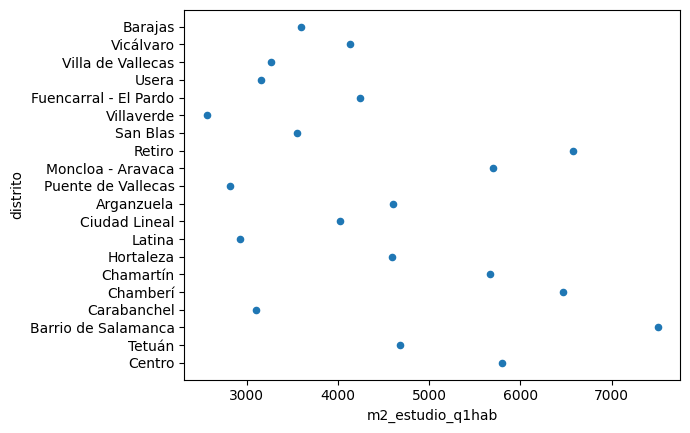

In [6]:
#vamos a hacer un grafico tipo mapa para representar los precios a continuacion:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#grafico de dispersion para observar como varia el precio entre los distritos:
df_precio_m2_por_distrito.plot.scatter(y="distrito", x="m2_estudio_q1hab");


In [7]:
df_precio_m2_por_distrito.describe()

,m2_medio,m2_estudio_q1hab
count,20.000000,20.000000
mean,4001.450000,4449.350000
std,1464.785865,1417.539131
min,1966.000000,2563.000000
25%,2690.750000,3241.750000
50%,3791.000000,4190.500000
75%,4907.000000,5677.500000
max,7157.000000,7504.000000


La media de m2_estudio_q1hab es: 4449.35


<AxesSubplot:>

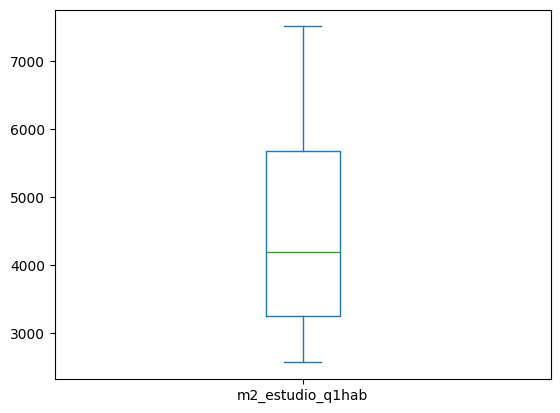

In [8]:
#vamos a realizar una grafica mas para poder observar cuales serian los distritos mas caros en madrid:
#calculamos primero la media de precios del m2 de un estudio
media_m2_estudio_q1hab = df_precio_m2_por_distrito['m2_estudio_q1hab'].mean()

print('La media de m2_estudio_q1hab es:', media_m2_estudio_q1hab)

mascara = df_precio_m2_por_distrito['m2_estudio_q1hab'] > media_m2_estudio_q1hab
filas_altas = df_precio_m2_por_distrito[mascara]

filas_altas


df_precio_m2_por_distrito.m2_estudio_q1hab.plot.box()

In [9]:
import folium
from folium import plugins 
import ipywidgets
import geocoder
import geopy
from vega_datasets import data as vds


In [10]:
#vamos a pasar los archivos anteriores con formato .xls a .csv
#precio m2 municipio madrid con menos de 1000 habitantes
url_precio_suelo_municipios_madrid_menos_1000hab="https://www.fomento.gob.es/be2/sedal/36401000.XLS"
response = getHttp(url_precio_suelo_municipios_madrid_menos_1000hab)

with open('data/precio_suelo_municipios_madri_1000hab.xls', 'wb') as f:
    f.write(response.content)

df = pd.read_excel('data/precio_suelo_municipios_madri_1000hab.xls', skiprows=10)
df.fillna(0)
df.rename(columns={"Unnamed: 1": "comunidad_autonoma"}, inplace=True)
df.dropna(subset=['comunidad_autonoma'], inplace=True)
df = df.loc[:, ['comunidad_autonoma', 'Año 2022']]
precio_m2_suelo_madrid_menos_1000hab = df[df['comunidad_autonoma'].str.contains('Madrid')]['Año 2022'].iloc[0]
print(precio_m2_suelo_madrid_menos_1000hab)



105.81


In [11]:
df

,comunidad_autonoma,Año 2022
2,TOTAL NACIONAL,76.11
3,Andalucía,79.52
4,Almería,n.s.
5,Cádiz,.
6,Córdoba,n.s.
...,...,...
59,Álava,n.s.
60,Guipúzcoa,n.s.
61,Vizcaya,108.15
62,Rioja (La),127.48


In [12]:

url_precio_suelo_municipios_madrid_menos_1000_a_5000hab="https://www.fomento.gob.es/be2/sedal/36401500.XLS"
response = getHttp(url_precio_suelo_municipios_madrid_menos_1000_a_5000hab)

with open('data/precio_suelo_municipios_madrid_1000a5000hab.xls', 'wb') as f:
    f.write(response.content)

df = pd.read_excel('data/precio_suelo_municipios_madrid_1000a5000hab.xls', skiprows=10)
df.fillna(0)
df.rename(columns={"Unnamed: 1": "comunidad_autonoma"}, inplace=True)
df.dropna(subset=['comunidad_autonoma'], inplace=True)
df = df.loc[:, ['comunidad_autonoma', 'Año 2022']]
precio_m2_suelo_madrid_menos_1000_5000hab = df[df['comunidad_autonoma'].str.contains('Madrid')]['Año 2022'].iloc[0]
print(precio_m2_suelo_madrid_menos_1000_5000hab)




137.26


In [13]:
url_precio_suelo_municipios_madrid_mas_50000hab="https://www.fomento.gob.es/be2/sedal/36403000.XLS"
response = getHttp(url_precio_suelo_municipios_madrid_mas_50000hab)

with open('data/url_precio_suelo_municipios_madrid_mas_50000hab.xls', 'wb') as f:
    f.write(response.content)

df = pd.read_excel('data/url_precio_suelo_municipios_madrid_mas_50000hab.xls', skiprows=10)
df.fillna(0)
df.rename(columns={"Unnamed: 1": "comunidad_autonoma"}, inplace=True)
df.dropna(subset=['comunidad_autonoma'], inplace=True)
df = df.loc[:, ['comunidad_autonoma', 'Año 2022']]
precio_m2_suelo_madrid_mas_50000hab = df[df['comunidad_autonoma'].str.contains('Madrid')]['Año 2022'].iloc[0]
print(precio_m2_suelo_madrid_mas_50000hab)

554.63


In [14]:
url_precio_suelo_municipios_madrid_menos_5000_a_10000hab="https://www.fomento.gob.es/be2/sedal/36402000.XLS"
response = getHttp(url_precio_suelo_municipios_madrid_menos_5000_a_10000hab)

with open('data/url_precio_suelo_municipios_madrid_menos_5000_a_10000hab.xls', 'wb') as f:
    f.write(response.content)

df = pd.read_excel('data/url_precio_suelo_municipios_madrid_menos_5000_a_10000hab.xls', skiprows=10)
df.fillna(0)
df.rename(columns={"Unnamed: 1": "comunidad_autonoma"}, inplace=True)
df.dropna(subset=['comunidad_autonoma'], inplace=True)
df = df.loc[:, ['comunidad_autonoma', 'Año 2022']]
precio_m2_suelo_madrid_menos_5000_10000hab = df[df['comunidad_autonoma'].str.contains('Madrid')]['Año 2022'].iloc[0]
print(precio_m2_suelo_madrid_menos_5000_10000hab)


209.57


In [15]:
#data frame secciones y distritos

url_distritos="https://datos.comunidad.madrid/catalogo/dataset/818366a8-9ae2-4b7d-8277-b804c0d8dead/resource/09709efa-6c1d-41c7-9912-fe156aa6fefa/download/secciones_censales.csv"
response = getHttp(url_distritos)

with open('data/archivo_distritos.csv', 'wb') as file:
    file.write(response.content)

# Leer el archivo CSV y convertirlo en un DataFrame
df = pd.read_csv('data/archivo_distritos.csv',encoding='latin-1', sep=';')

# Imprimir el DataFrame
print(df)

#solo te interesa 

      seccion_codigo  distrito_codigo distrito_nombre  municipio_codigo  \
0             101001              101             NaN                 1   
1             201001              201             NaN                 2   
2             201002              201             NaN                 2   
3             301001              301             NaN                 3   
4             401001              401             NaN                 4   
...              ...              ...             ...               ...   
4412        90301021            90301             NaN               903   
4413        90301022            90301             NaN               903   
4414        90301023            90301             NaN               903   
4415        90301024            90301             NaN               903   
4416        90301025            90301             NaN               903   

       municipio_nombre  superficie_km2  
0           ACEBEDA, LA           21.86  
1              

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seccion_codigo    4417 non-null   int64  
 1   distrito_codigo   4417 non-null   int64  
 2   distrito_nombre   2443 non-null   object 
 3   municipio_codigo  4417 non-null   int64  
 4   municipio_nombre  4417 non-null   object 
 5   superficie_km2    4417 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 207.2+ KB


In [17]:
df= df.drop(columns=['distrito_nombre'])
df

,seccion_codigo,distrito_codigo,municipio_codigo,municipio_nombre,superficie_km2
0,101001,101,1,"ACEBEDA, LA",21.86
1,201001,201,2,AJALVIR,12.81
2,201002,201,2,AJALVIR,6.99
3,301001,301,3,ALAMEDA DEL VALLE,25.70
4,401001,401,4,"ALAMO, EL",5.04
...,...,...,...,...,...
4412,90301021,90301,903,TRES CANTOS,0.10
4413,90301022,90301,903,TRES CANTOS,0.22
4414,90301023,90301,903,TRES CANTOS,3.22
4415,90301024,90301,903,TRES CANTOS,0.12


In [18]:
print(df.columns)

Index(['seccion_codigo', 'distrito_codigo', 'municipio_codigo',
       'municipio_nombre', 'superficie_km2'],
      dtype='object')


In [19]:
#filtra por municipio madrid
df[df['municipio_nombre']=='MADRID']

,seccion_codigo,distrito_codigo,municipio_codigo,municipio_nombre,superficie_km2
1081,7911157,7911,79,MADRID,0.04
1082,7911158,7911,79,MADRID,0.03
1083,7911160,7911,79,MADRID,0.06
1084,7911161,7911,79,MADRID,0.03
1085,7911162,7911,79,MADRID,0.02
...,...,...,...,...,...
3519,7912081,7912,79,MADRID,0.03
3520,7912082,7912,79,MADRID,0.02
3521,7912083,7912,79,MADRID,0.02
3522,7912084,7912,79,MADRID,0.02


In [20]:
# Leer el archivo CSV y convertirlo en un DataFrame
df = pd.read_csv('data/pob_madrid.csv',encoding='latin-1', sep=';')

df.dropna(subset=['Total'], inplace=True)
# Imprimir el DataFrame
df["Total"] = df["Total"].str.replace(".", "").astype(int)


df['Municipios'] = df['Municipios'].apply(lambda x: ' '.join(x.split()[1:]))
df_condic_municipios=  df.loc[(df['Periodo'] == 2022) & (df['Total'] > 50000) & (df['Sexo'] == 'Total') ]

df_filtrado_pob_municipios = df_condic_municipios.drop_duplicates(subset=['Municipios'], keep='first')
df_filtrado_pob_municipios
#solo te interesa 

c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Municipios,Sexo,Periodo,Total
0,Madrid,Total,2022,6750336
405,Alcalá de Henares,Total,2022,196888
486,Alcobendas,Total,2022,117041
567,Alcorcón,Total,2022,170296
1053,Aranjuez,Total,2022,59762
1134,Arganda del Rey,Total,2022,57553
1782,Boadilla del Monte,Total,2022,62627
3645,Collado Villalba,Total,2022,64263
3888,Colmenar Viejo,Total,2022,53389
4131,Coslada,Total,2022,80596


In [21]:
import requests


url = f"https://www.fotocasa.es/indice-precio-vivienda/madrid-provincia/todas-las-zonas"
headers = {
    "accept": 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    "accept-encoding": 'gzip, deflate, br',
    "accept-language": 'es-ES,es;q=0.9',
    "cache-control": 'max-age=0',
    "dnt":"1",
    "sec-ch-ua": '"Chromium";v="110", "Not A(Brand";v="24", "Google Chrome";v="110"',
    "sec-ch-ua-mobile": "?0",
    "sec-fetch-dest": "document",
    "sec-fetch-mode": "navigate",
    "sec-fetch-site": "none",
    "sec-fetch-user": "?1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36",
}
response= requests.get(url, headers=headers)


soup_html_madrid_todas=bs(response.text, 'lxml')
tabla_municipios = soup_html_madrid_todas.find('table', {'class': 'table-price'})
lista_de_municipios=[]

# Buscamos todas las filas de la tabla
filas = tabla_municipios.find_all('tr')

lista_municipios = []
for row in tabla_municipios.find_all('tr')[1:]:
    td = row.find_all('td')
    municipio = td[0].text.strip()
    precio_medio_m2 = int(td[1].text.replace("€/m²", "").replace(".", ""))
    lista_municipios.append({'municipio':municipio, 'precio_m2':precio_medio_m2})
df_lista_municipios=  pd.DataFrame(lista_municipios)
df_lista_municipios['municipio'] = df_lista_municipios['municipio'].replace('Madrid Capital', 'Madrid')
df_lista_municipios


,municipio,precio_m2
0,Madrid,4290
1,Alcalá de Henares,2145
2,Móstoles,2033
3,Parla,1656
4,Getafe,2266
5,Torrejón de Ardoz,1989
6,Fuenlabrada,1973
7,Leganés,2193
8,Alcorcón,2392
9,Valdemoro,1883


In [22]:


df_filtrado_pob_municipios['municipio_clean'] = df_filtrado_pob_municipios['Municipios'].str.lower().str.replace(' ', '')
df_lista_municipios['municipio_clean'] = df_lista_municipios['municipio'].str.lower().str.replace(' ', '')

merged_df = pd.merge(df_filtrado_pob_municipios, df_lista_municipios, left_on='municipio_clean', right_on='municipio_clean', how='inner')
merged_df


#falta calcular diferencia de m2 cuadrado precio respecto a madrid ciudad, esa diferencia en porcentaje añadirla al precio suelo y ya tenemos estimacion

c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Municipios,Sexo,Periodo,Total,municipio_clean,municipio,precio_m2
0,Madrid,Total,2022,6750336,madrid,Madrid,4290
1,Alcalá de Henares,Total,2022,196888,alcaládehenares,Alcalá de Henares,2145
2,Alcobendas,Total,2022,117041,alcobendas,Alcobendas,2850
3,Alcorcón,Total,2022,170296,alcorcón,Alcorcón,2392
4,Aranjuez,Total,2022,59762,aranjuez,Aranjuez,1696
5,Collado Villalba,Total,2022,64263,colladovillalba,Collado Villalba,2110
6,Coslada,Total,2022,80596,coslada,Coslada,2439
7,Fuenlabrada,Total,2022,189891,fuenlabrada,Fuenlabrada,1973
8,Getafe,Total,2022,183219,getafe,Getafe,2266
9,Leganés,Total,2022,186660,leganés,Leganés,2193


In [23]:
precio_medio_pob_mas50000hab = int(merged_df['precio_m2'].mean() )
print('El precio medio del del m2 construido por municipios de mas de 50000 es: ', precio_medio_pob_mas50000hab)


# Calcular el precio promedio del metro cuadrado en Madrid
precio_promedio_madrid = merged_df.loc[merged_df['Municipios'] == 'Madrid', 'precio_m2'].values[0]
print(precio_promedio_madrid)
# Calcular la diferencia porcentual
diferencia_porcentual = int(((precio_promedio_madrid - precio_medio_pob_mas50000hab) / precio_medio_pob_mas50000hab) * 100)
print('El precio del m2 en madrid es un :', diferencia_porcentual ,'% mas caro')


El precio medio del del m2 construido por municipios de mas de 50000 es:  2491
4290
El precio del m2 en madrid es un : 72 % mas caro


In [24]:
##  CONCLUSIONES
# Costo casa contenedor + coste suelo calculo costo m2 en un territorio con menos de 1000 hab en Madrid
precio_passivhaus_m2= 1820
precio_en_terreno_menos_1000hab= precio_m2_suelo_madrid_menos_1000hab + precio_passivhaus_m2


# Costo casa contenedor + coste suelo calculo costo m2 en un territorio que tiene entre 1000 y 5000 hab en Madrid
precio_en_terreno_entre_1000y5000hab= precio_m2_suelo_madrid_menos_1000_5000hab + precio_passivhaus_m2


# Costo casa contenedor + coste suelo calculo costo m2 en un territorio que tiene entre 1000 y 5000 hab en Madrid
precio_en_terreno_entre_5000y10000hab= precio_m2_suelo_madrid_menos_5000_10000hab + precio_passivhaus_m2


precios_dic= {"Valor Haus en terreno con -1000hab":precio_en_terreno_menos_1000hab, "Valor Haus en terreno entre 1000y500hab":precio_en_terreno_entre_1000y5000hab, "Valor Haus en terreno entre 5000y10000hab":precio_en_terreno_entre_5000y10000hab}
df_tabla_precios_m2= pd.DataFrame(precios_dic, index=[0])
df_tabla_precios_m2

#Costo medio estimado de m2 suelo en madrid
valor_medio_estimado_suelo_madrid = precio_m2_suelo_madrid_mas_50000hab + (precio_m2_suelo_madrid_mas_50000hab * diferencia_porcentual / 100)

# Costo casa contenedor + coste suelo aproximado en municipios de 50000 hab (incluye Madrid)
precio_casa_contendedor_madrid= valor_medio_estimado_suelo_madrid + precio_passivhaus_m2

# Comparar precio con valor casas mas pequeñas ciudad y ver si es rentable


# calcula la media de la columna m2_medio
minimo_m2_medio = df_precio_m2_por_distrito['m2_medio'].min()


# calcula la variacion de cada valor respecto al valor medio
df_precio_m2_por_distrito['porcentaje_variacion'] = ((df_precio_m2_por_distrito['m2_medio'] - minimo_m2_medio) / minimo_m2_medio * 100).round(2)

# muestra el DataFrame resultante
df_precio_m2_por_distrito['precio_m2_suelo'] = valor_medio_estimado_suelo_madrid + (valor_medio_estimado_suelo_madrid * df_precio_m2_por_distrito['porcentaje_variacion'] / 100 )
df_precio_m2_por_distrito['precio_m2_suelo'] = df_precio_m2_por_distrito['precio_m2_suelo'].astype(int)
df_precio_m2_por_distrito['precio_casa_contenedo_suelo_inc'] = df_precio_m2_por_distrito['precio_m2_suelo'] +precio_passivhaus_m2
df_precio_m2_por_distrito['distrito'] = df_precio_m2_por_distrito['distrito'].replace('Barrio de Salamanca', 'Salamanca')

df_precio_m2_por_distrito
#agregaremos una columa que sume el precio de fabricacion del contenedor por m2 mas el precio del suelo

,distrito,url,m2_medio,m2_estudio_q1hab,porcentaje_variacion,precio_m2_suelo,precio_casa_contenedo_suelo_inc
0,Centro,centro,5941,5802,202.19,2882,4702
1,Tetuán,tetuan,4443,4675,125.99,2155,3975
2,Salamanca,barrio-de-salamanca,7157,7504,264.04,3472,5292
3,Carabanchel,carabanchel,2501,3100,27.21,1213,3033
4,Chamberí,chamberi,6228,6471,216.79,3022,4842
5,Chamartín,chamartin,5590,5671,184.33,2712,4532
6,Hortaleza,hortaleza,4233,4592,115.31,2053,3873
7,Latina,latina,2654,2927,34.99,1287,3107
8,Ciudad Lineal,ciudad-lineal,3456,4024,75.79,1676,3496
9,Arganzuela,arganzuela,4362,4601,121.87,2116,3936


In [25]:

df_renta_media_es = pd.read_csv('data/renta_media_por_municipio_CMadrid.csv',encoding='latin-1', sep=';')

municipios_madrid = df_renta_media_es[df_renta_media_es["Municipios"].str.contains(r"\d+ \bMadrid\b")].copy()
municipios_madrid.loc[municipios_madrid.index, "Municipios"] = municipios_madrid["Municipios"].str.replace(r"^\d* ", "", regex=True)
municipios_madrid.loc[municipios_madrid.index, "Distritos"] = municipios_madrid["Distritos"].str.replace(r"\d+\sMadrid\s", "", regex=True)
municipios_madrid.loc[municipios_madrid.index, "Secciones"] = municipios_madrid["Secciones"].str.replace(r"\d+\sMadrid\s", "", regex=True)
municipios_madrid.loc[municipios_madrid.index, "Distritos"] = municipios_madrid["Distritos"].str.replace(r'^distrito\s?0?', "", regex=True)
municipios_madrid['Indicadores de renta media y mediana'] = municipios_madrid['Total']



renta_media_distritos_madrid_2020 = municipios_madrid[municipios_madrid['Secciones'].isna()].dropna(subset=['Distritos']).drop('Secciones', axis=1).drop('Total', axis=1).drop('Periodo', axis=1)
renta_media_distritos_madrid_2020.rename(columns={"Indicadores de renta media y mediana": "renta_media"}, inplace=True)
renta_media_distritos_madrid_2020

,Municipios,Distritos,renta_media
1274,Madrid,1,36.984
1386,Madrid,2,45.310
1496,Madrid,3,56.302
1592,Madrid,4,60.401
1719,Madrid,5,69.202
1821,Madrid,6,38.799
1940,Madrid,7,55.757
2065,Madrid,8,54.292
2250,Madrid,9,62.202
2336,Madrid,10,32.957


In [26]:
url_infodistritos="https://datos.madrid.es/egob/catalogo/300497-11326516-distritos-municipales-madrid.csv"
response= getHttp(url_infodistritos)

with open('data/info_madrid_distritos.csv', 'wb') as file:
    file.write(response.content)

df_info_distritos = pd.read_csv('data/info_madrid_distritos.csv',encoding='latin-1', sep=';')
df_info_distritos = df_info_distritos.loc[:, ['COD_DIS', 'NOMBRE']]
df_info_distritos['NOMBRE'] = df_info_distritos['NOMBRE'].replace('San Blas - Canillejas', 'San Blas')
df_info_distritos




,COD_DIS,NOMBRE
0,1,Centro
1,2,Arganzuela
2,3,Retiro
3,4,Salamanca
4,5,Chamartín
5,6,Tetuán
6,7,Chamberí
7,8,Fuencarral - El Pardo
8,9,Moncloa - Aravaca
9,10,Latina


In [27]:
# Modificamos la columna "Distritos" del primer dataframe
renta_media_distritos_madrid_2020["Distritos"] = renta_media_distritos_madrid_2020["Distritos"].str.replace("distrito ", "").astype(int)
df_renta = pd.merge(renta_media_distritos_madrid_2020, df_info_distritos, left_on="Distritos", right_on="COD_DIS")
df_renta.drop("COD_DIS", axis=1, inplace=True)

df_renta


,Municipios,Distritos,renta_media,NOMBRE
0,Madrid,1,36.984,Centro
1,Madrid,2,45.310,Arganzuela
2,Madrid,3,56.302,Retiro
3,Madrid,4,60.401,Salamanca
4,Madrid,5,69.202,Chamartín
5,Madrid,6,38.799,Tetuán
6,Madrid,7,55.757,Chamberí
7,Madrid,8,54.292,Fuencarral - El Pardo
8,Madrid,9,62.202,Moncloa - Aravaca
9,Madrid,10,32.957,Latina


In [33]:
df_final = pd.merge(df_renta, df_precio_m2_por_distrito, left_on='NOMBRE', right_on='distrito')

# imprimir el DataFrame resultante
df_final.drop(['NOMBRE', 'url','Municipios'], axis=1, inplace=True)

df_final['diferencia_eu_m2'] = df_final['m2_estudio_q1hab'] - df_final['precio_casa_contenedo_suelo_inc']

df_final

,Distritos,renta_media,distrito,m2_medio,m2_estudio_q1hab,porcentaje_variacion,precio_m2_suelo,precio_casa_contenedo_suelo_inc,diferencia_eu_m2
0,1,36.984,Centro,5941,5802,202.19,2882,4702,1100
1,2,45.310,Arganzuela,4362,4601,121.87,2116,3936,665
2,3,56.302,Retiro,5297,6578,169.43,2570,4390,2188
3,4,60.401,Salamanca,7157,7504,264.04,3472,5292,2212
4,5,69.202,Chamartín,5590,5671,184.33,2712,4532,1139
5,6,38.799,Tetuán,4443,4675,125.99,2155,3975,700
6,7,55.757,Chamberí,6228,6471,216.79,3022,4842,1629
7,8,54.292,Fuencarral - El Pardo,3986,4246,102.75,1934,3754,492
8,9,62.202,Moncloa - Aravaca,4777,5697,142.98,2317,4137,1560
9,10,32.957,Latina,2654,2927,34.99,1287,3107,-180


In [38]:
#Renta, una vez analizado que barrios son los que el m2 esta mas caro, extraemos renta media de la zona
# llegamos a la conclusion para que clase social es accesible o publico objetivo

df_distritos_con_m2_mas_barato = df_final.query('diferencia_eu_m2 <= 0')
df_distritos_con_m2_mas_barato


,Distritos,renta_media,distrito,m2_medio,m2_estudio_q1hab,porcentaje_variacion,precio_m2_suelo,precio_casa_contenedo_suelo_inc,diferencia_eu_m2
9,10,32.957,Latina,2654,2927,34.99,1287,3107,-180
12,13,27.714,Puente de Vallecas,2304,2821,17.19,1117,2937,-116
15,17,29.640,Villaverde,1966,2563,0.00,953,2773,-210


In [39]:
df_distritos_con_m2_mas_caro = df_final.query('diferencia_eu_m2 >= 0')
df_distritos_con_m2_mas_caro


,Distritos,renta_media,distrito,m2_medio,m2_estudio_q1hab,porcentaje_variacion,precio_m2_suelo,precio_casa_contenedo_suelo_inc,diferencia_eu_m2
0,1,36.984,Centro,5941,5802,202.19,2882,4702,1100
1,2,45.310,Arganzuela,4362,4601,121.87,2116,3936,665
2,3,56.302,Retiro,5297,6578,169.43,2570,4390,2188
3,4,60.401,Salamanca,7157,7504,264.04,3472,5292,2212
4,5,69.202,Chamartín,5590,5671,184.33,2712,4532,1139
5,6,38.799,Tetuán,4443,4675,125.99,2155,3975,700
6,7,55.757,Chamberí,6228,6471,216.79,3022,4842,1629
7,8,54.292,Fuencarral - El Pardo,3986,4246,102.75,1934,3754,492
8,9,62.202,Moncloa - Aravaca,4777,5697,142.98,2317,4137,1560
10,11,30.890,Carabanchel,2501,3100,27.21,1213,3033,67
